Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [3]:
#Dimensiones de la imagen a crear
ancho = 200
alto = 300

Imagen en grises

In [4]:
#Crea una imagen de un único plano, que se interpreta como nivel de gris (0 negro, 255 blanco)
gris_img = np.zeros((ancho,alto,1), dtype = np.uint8)
#Muestra dimensiones de la imagen creada
print(gris_img.shape)

(200, 300, 1)


Muestra imagen con imshow (OpenCV) en ventana independiente

In [5]:
#Muestra la imagen (negra al inicializarse a 0) con las utilidades de OpenCV en una ventana independiente
cv2.imshow('Imagen', gris_img)
cv2.imshow('Imagen2', gris_img)

cv2.waitKey(-1) # Se detiene hasta pulsar tecla (>0 milisegundos)
cv2.destroyAllWindows() # Destruye todas las ventanas

Muestra imagen con matplotlib

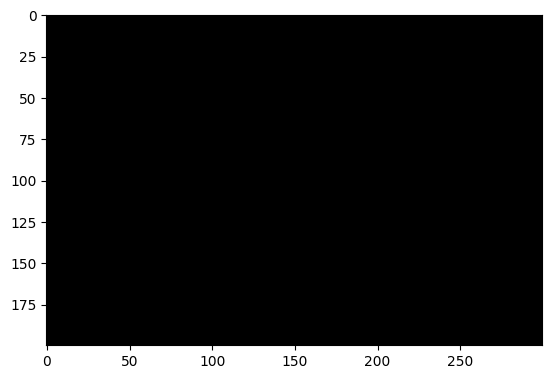

In [6]:
#Muestra la imagen con matplotlib, aparece integrada en el cuaderno
#Es necesario especificar que el mapa de color usado es de grises
#plt.imshow(gris_img, cmap='gray')
#plt.imshow(gris_img)
#plt.show()

#replicar una imagen de gris creando una imagen gris pero con tres planos (RGB)
img2 = cv2.merge((gris_img,gris_img,gris_img))
plt.imshow(img2)
plt.show()

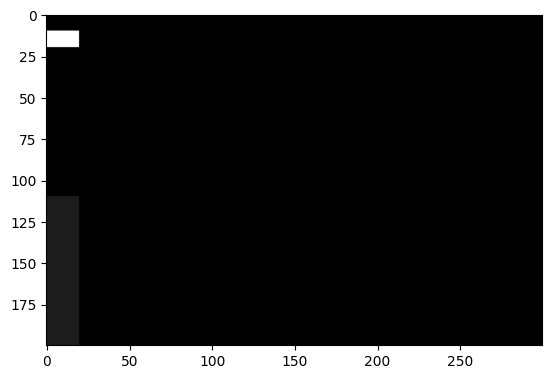

In [7]:
#Modifica un par de zonas rectangulares de la imagen
gris_img[:] = 0
gris_img[10:20,0:20,0] = 255 #Especifica el canal 0
gris_img[110:220,0:20,0] = 28 #
#gris_img[50:70,40:60] = 255 #realmente no es necesario con un único plano

#Muestra la imagen con matplotlib
#Es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray')
plt.show()

Imagen con tono de gris aleatorio

(200, 300, 1)


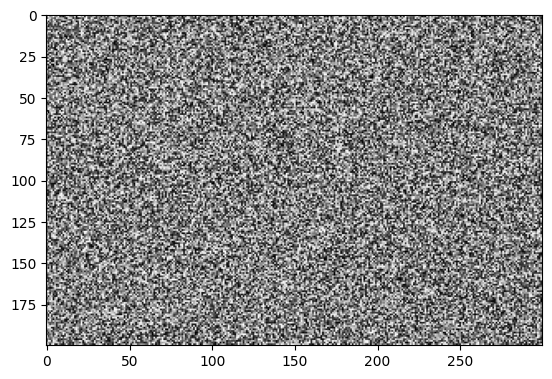

In [8]:
#Crea imagen con un único plano (gris)
gris_img = np.random.randint(255, size=(ancho,alto, 1))
#Muestra dimensiones
print(gris_img.shape)
#Visualiza
plt.imshow(gris_img, cmap='gray') #Visualiza con mapa de color gris
plt.show()

Asignamos valor a los píxeles de una zona concreta

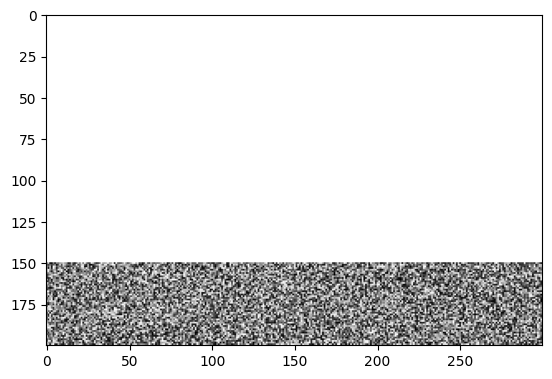

In [9]:
#Modifica la primera mitad de la imagen, asignando 255, es decir blanco
gris_img[0:int(alto/2),:,:] = 255
#Visualiza con mapa de color gris
plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

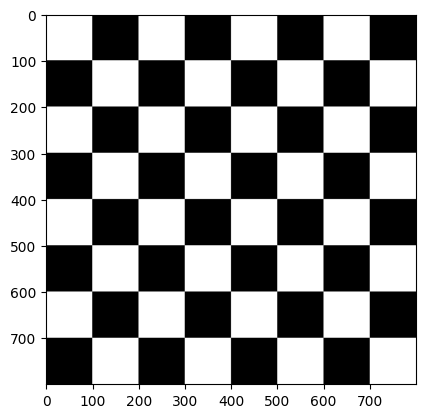

In [10]:

class Chessboard:
    """
        Chessboard:

        Creates a chessboard table.
        It can be converted to image using numpy.
    """
    def __init__(self, n_rows = 8):
        self.size = n_rows * 100
        self.n_rows = n_rows
        self._square_size=self.size//n_rows

    def _paintSquare(self, image, point, width, color):
        image[point[1]:point[1] + width,point[0]:point[0]+width] = color
    
    def to_img(self):
        img = np.zeros((self.size, self.size,1), dtype = np.uint8)
        paint_phase = 0
        
        for x in range(0, self.size, (self.size//self.n_rows)):
            for y in range(paint_phase, self.size, (self.size//self.n_rows) * 2):
                self._paintSquare(img, (y, x), self._square_size, 255)
            paint_phase = 100 if paint_phase == 0 else 0
        return img
    

chessboard = Chessboard(n_rows=8)
image = chessboard.to_img()

plt.imshow(image, cmap='gray')
plt.show()



Imagen en color

(200, 200, 3)


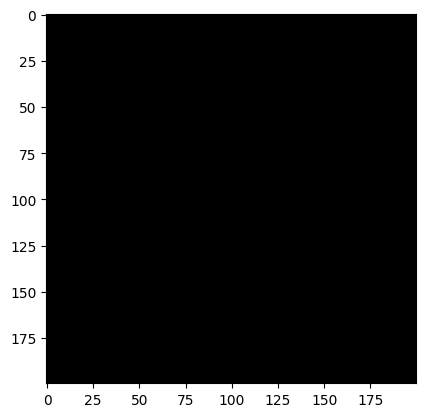

In [11]:
#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)
#Dimensiones
print(color_img.shape)
#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


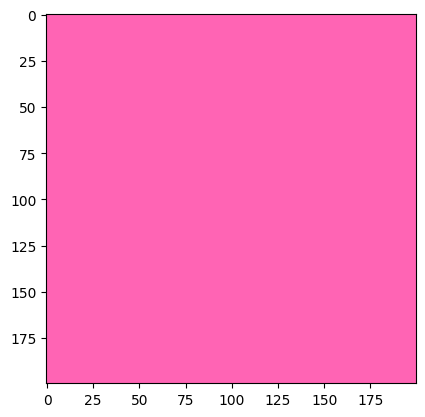

In [14]:
#Modifica el primer plano de color (Rojo, ya que es RGB)
color_img[:,:,0] = 255 
color_img[:,:,1] = 100 #Prueba otras combinaciones
color_img[:,:,2] = 180
plt.imshow(color_img) 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

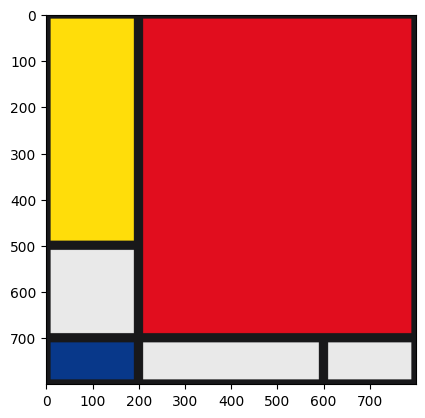

In [12]:
class Rectangle:
    def __init__(self, width, height, rgb, offset = 0):
        self.width = width
        self.height = height
        self.rgb = rgb
        self.offset = offset

    def apply(self, image, point):
        image[point[1]+self.offset:point[1] + self.height-self.offset , point[0]+self.offset:point[0]+self.width-self.offset] = self.rgb

    
color_img = np.zeros((800, 800,3), dtype = np.uint8)
background = Rectangle(800, 800, (24, 24, 26))
background.apply(color_img, (0, 0))

rectangles = [
    Rectangle(200, 500, (255, 221, 10), offset=10),
    Rectangle(200, 200, (233, 233, 233), offset=10),
    Rectangle(200, 100, (8, 56, 138), offset=10),
    Rectangle(600, 700, (225, 13, 30), offset=10),
    Rectangle(400, 100, (233, 233, 233), offset=10),
    Rectangle(200, 100, (233, 233, 233), offset=10)
]

positions = [(0, 0), (0, 500), (0, 700), (200, 0), (200, 700), (600, 700)]

for x in range(0, len(positions)):
    rectangles[x].apply(color_img, positions[x])

plt.imshow(color_img)
plt.show()


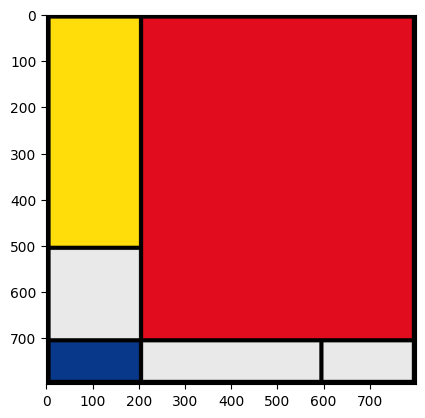

In [13]:
#Using opencv
color_img = np.zeros((800, 800,3), dtype = np.uint8)

cv2.rectangle(color_img, (10, 10), (200, 500), (255, 221, 10), -1)
cv2.rectangle(color_img, (10, 510), (200, 700), (233, 233, 233), -1)
cv2.rectangle(color_img, (10, 710), (200, 790), (8, 56, 138), -1)

cv2.rectangle(color_img, (210, 10), (790, 700), (225, 13, 30), -1)
cv2.rectangle(color_img, (210, 710), (590, 790), (233, 233, 233), -1)
cv2.rectangle(color_img, (600, 710), (790, 790), (233, 233, 233), -1)

plt.imshow(color_img)
plt.show()

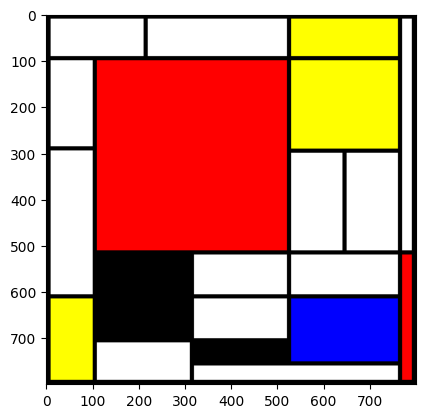

In [77]:
color_img = np.zeros((800, 800, 3), dtype = np.uint8)

cv2.rectangle(color_img, (10, 10), (210, 90), (255, 255, 255), -1)
cv2.rectangle(color_img, (220, 10), (520, 90), (255, 255, 255), -1)
cv2.rectangle(color_img, (530, 10), (760, 90), (255, 255, 0), -1)

cv2.rectangle(color_img, (10, 100), (100, 285), (255, 255, 255), -1)
cv2.rectangle(color_img, (10, 295), (100, 605), (255, 255, 255), -1)
cv2.rectangle(color_img, (10, 615), (100, 790), (255, 255, 0), -1)

cv2.rectangle(color_img, (110, 100), (520, 510), (255, 0, 0), -1)
cv2.rectangle(color_img, (530, 100), (760, 290), (255, 255, 0), -1)
cv2.rectangle(color_img, (530, 300), (640, 510), (255, 255, 255), -1)
cv2.rectangle(color_img, (650, 300), (760, 510), (255, 255, 255), -1)

cv2.rectangle(color_img, (110, 710), (310, 790), (255, 255, 255), -1)
cv2.rectangle(color_img, (320, 520), (520, 605), (255, 255, 255), -1)
cv2.rectangle(color_img, (320, 615), (520, 700), (255, 255, 255), -1)

cv2.rectangle(color_img, (530, 520), (760, 605), (255, 255, 255), -1)
cv2.rectangle(color_img, (530, 615), (760, 750), (0, 0, 255), -1)

cv2.rectangle(color_img, (770, 10), (790, 510), (255, 255, 255), -1)
cv2.rectangle(color_img, (770, 520), (790, 790), (255, 0, 0), -1)
cv2.rectangle(color_img, (320, 760), (760, 790), (255, 255, 255), -1)

plt.imshow(color_img)
plt.show()

Funciones de dibujo.
OpenCV dispone de distintas funciones específicas para dibujar formas básicas (más información https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html )

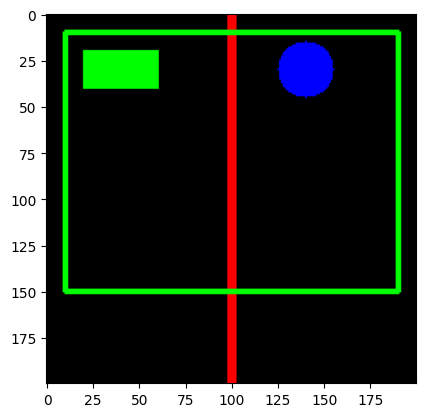

True

In [14]:
#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)

#Línea roja vertical de grosor 3
cv2.line(color_img,(int(ancho/2),0),(int(ancho/2),alto),(255,0,0),3)
#Rectángulo con grosor 2
cv2.rectangle(color_img,(10,10),(ancho-10,int(alto/2)),(0,255,0),2)
#Rectángulo relleno
cv2.rectangle(color_img,(20,20),(60,40),(0,255,0),-1)
#Círculo de radio 15 relleno
cv2.circle(color_img,(ancho-60,30), 15, (0,0,255), -1)
#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

Abrir imagen almacenada en disco

(1200, 1180, 3)


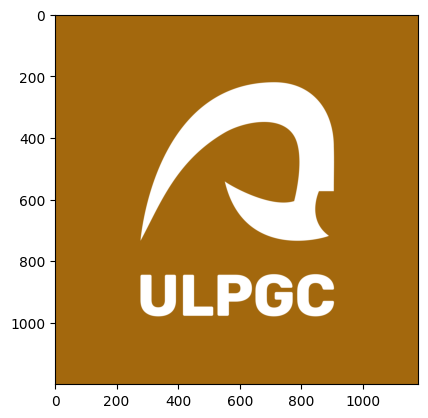

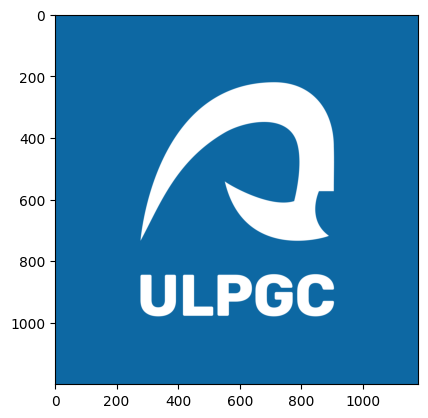

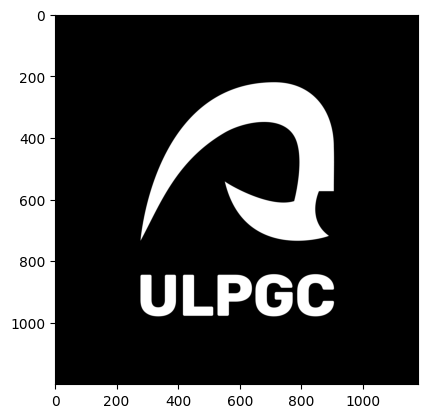

In [15]:
#Carga imagen desde disco
img = cv2.imread('logo_ulpgc_vertical_acronimo_mancheta_azul.png') 
#Dimensiones
print(img.shape)
#Muestra
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes de disco en formato BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

#Fuerza lectura en grises
img = cv2.imread('logo_ulpgc_vertical_acronimo_mancheta_azul.png', cv2.IMREAD_GRAYSCALE) 
plt.imshow(img, cmap='gray') 
plt.show()


Abre un archivo de vídeo

In [16]:
vid = cv2.VideoCapture('Ayagaures_vibe_result.mp4') #Busca n vídeo propio
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:  
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(1000) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

OpenCV: Couldn't read video stream from file "Ayagaures_vibe_result.mp4"


Muestra entrada de la cámara

In [17]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    if ret:  
        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Separa los tres planos de la imagen captada por la webcam

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Modifica de alguna forma los valores de un plano de la imagen

In [8]:
vid = cv2.VideoCapture(0)
from scipy.ndimage import zoom

import numpy as np

def convolution2D(image, kernel):
    # Perform 2D convolution using cv2.filter2D
    convolution_result = cv2.filter2D(image, -1, kernel)

    # Apply thresholding
    thresholded_result = np.where(convolution_result > 125, 255, 0)
        # Convert the result to the correct data type (8-bit unsigned integer)
    thresholded_result = thresholded_result.astype(np.uint8)

    return cv2.applyColorMap(thresholded_result, cv2.COLORMAP_JET)

def pixelate_numpy_array(input_image, pixel_size):
    try:
        # Calculate the new dimensions
        height, width, _ = input_image.shape
        new_height = height // pixel_size
        new_width = width // pixel_size

        # Resize the image using scipy's zoom function to pixelate it
        pixelated_image = zoom(input_image, (1/pixel_size, 1/pixel_size, 1), order=0)

        # Scale it back up to the original size
        pixelated_image = zoom(pixelated_image, (pixel_size, pixel_size, 1), order=0)

        return pixelated_image.astype(np.uint8)
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


while(True):
    ret, frame =  vid.read()

    # font
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    fontScale = 1
    color = (8, 56, 138)
    thickness = 2
    text = "Opencv"
    
    textsize = cv2.getTextSize(text, font, fontScale=fontScale, thickness=thickness)[0]
    org = ((frame.shape[1] - textsize[0])//2 , 50)

    # get boundary of this text
    # Using cv2.putText() method
    image = cv2.putText(frame, text, org, font, 
                    fontScale, color, thickness, cv2.LINE_AA)

    
    r = frame[:,:,0]
    g = frame[:,:,1]
    b = frame[:,:,2]

    r_modified = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)
    g_modified = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)
    b_modified = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)

    for x in range(0, r.shape[0]):
        for y in range(0, r.shape[1]):
            r_modified[x][y] = [0, 0, r[x][y]]

    for x in range(0, r.shape[0]):
        for y in range(0, r.shape[1]):
            g_modified[x][y] = [0, g[x][y], 0 ]

    for x in range(0, r.shape[0]):
        for y in range(0, r.shape[1]):
            b_modified[x][y] = [b[x][y], 0 , 0]

    final = np.hstack((r_modified, g_modified, b_modified))

    final = np.vstack((final, np.hstack((convolution2D(r, np.array([[1,1, 1], [0, 0, 0], [1, 1, 1]])), convolution2D(r, np.array([[1,1, 1], [0, 0, 0], [1, 1, 1]])), convolution2D(r, np.array([[1,1, 1], [0, 0, 0], [1, 1, 1]]))))))


    cv2.imshow("CAMERA", final)
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break



vid.release()

cv2.destroyAllWindows()


KeyboardInterrupt: 

Evento de ratón para mostrar el valor RGB del píxel

In [6]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  

        px = x
        py = y

     
  

In [7]:

vid = cv2.VideoCapture(0)


# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
            
        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [22]:
#PIXEL MAS CLARO

video = cv2.VideoCapture(0)

while(True):

    ret, image = video.read()

    pmas_claro = np.unravel_index(np.argmax(np.average(image, axis=2)), image.shape[:2])
    pmas_oscuro = np.unravel_index(np.argmin(np.average(image, axis=2)), image.shape[:2])

    cv2.circle(image, pmas_claro, 20, (255, 0, 0), -1)
    cv2.circle(image, pmas_oscuro, 20, (0, 0, 255), -1)

    cv2.imshow("cam", image)

    if cv2.waitKey(20) == 27:
        break

video.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

Pop art
Salida de la webcam "inspirada" en Andy Warhol

In [8]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = 255 - r
        tr[:,:,1] = g
        tr[:,:,2] = b
        
        bl[:,:,0] = r
        bl[:,:,1] = 255 - b
        bl[:,:,2] = g

        br[:,:,0] = b
        br[:,:,1] = g
        br[:,:,2] = 255 - r
    
        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Transformando la imagen capturada en una colección de círculos, cuyo radio depende de la intensidad promedio de la zona

In [7]:
vid = cv2.VideoCapture(0)

ncells = 10
off = int(ncells/2)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Dimensiones originales
        h, w, c = frame.shape
        #Redimensiono
        down_frame = cv2.resize(frame, (int(w/ncells),int(h/ncells)),cv2.INTER_NEAREST)
        #Dimensiones reducidas
        h2, w2, c2 = down_frame.shape

        #Separamos canales
        r = down_frame[:,:,0]
        g = down_frame[:,:,1]
        b = down_frame[:,:,2]

        # Creamos imagen negra
        gris_up_frame = np.zeros((h2*ncells,w2*ncells,1), dtype = np.uint8)

        for y in range(0,h2):
            for x in range(0,w2):
                # La suma de los valores RGB define el radio del círculo
                rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))
                cv2.circle(gris_up_frame,(x*ncells+off, y*ncells + off), rad, (255,255,255), -1)

    
        # Muestra fotograma resultante
        cv2.imshow('Cam', gris_up_frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

/var/folders/vg/6cn3vk_s2w9dzynzrjf4qw880000gn/T/ipykernel_10950/4226927672.py:29: RuntimeWarning: overflow encountered in scalar add
  rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))


TAREA: Haz tu propuesta pop art

In [14]:
def convolution2D(image, kernel = np.array([[1,1,1], [0,0,0], [1,1,1]]), colorScheme=cv2.COLORMAP_JET):
    # Perform 2D convolution using cv2.filter2D
    convolution_result = cv2.filter2D(image, -1, kernel)

    # Apply thresholding
    thresholded_result = np.where(convolution_result > 244, 255, 0)
        # Convert the result to the correct data type (8-bit unsigned integer)
    thresholded_result = thresholded_result.astype(np.uint8)

    return cv2.applyColorMap(thresholded_result, colorScheme)

def pixelate_numpy_array(input_image, pixel_size):
    height, width, channels = input_image.shape

    for x in range(0, height, pixel_size//2):
        for y in range(0, width, pixel_size//2):
            color = input_image[x][y]
            input_image[x:x+pixel_size//2,y:y+pixel_size//2] = color
            
    
    return input_image



cam = cv2.VideoCapture(0)

while True:
    
    ret, image = cam.read()

    im1 = image.copy()
    im1 = pixelate_numpy_array(im1, 40)
    im2 = image.copy()
    im2 = pixelate_numpy_array(convolution2D(im2, kernel = np.array([[1,0,1], [1,0,1], [1,0,1]]), colorScheme=cv2.COLORMAP_TURBO), 20)
    im3 = image.copy()
    im3 = pixelate_numpy_array(convolution2D(im3, kernel = np.array([[1,1,1], [1,1,1], [1,1,1]]), colorScheme=cv2.COLORMAP_AUTUMN), 20)
    im4 = image.copy()
    im4 = pixelate_numpy_array(convolution2D(im4, colorScheme=cv2.COLORMAP_DEEPGREEN), 20)


    result = np.vstack((np.hstack((im1, im2)), np.hstack((im3, im4))))

    cv2.imshow("POP ART", result)

    if cv2.waitKey(20) == 27:
        break


cam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 